In [1]:
# script to draw the gen variable distributions 
import ROOT
from plugins.CMS_lumi import CMS_lumi

Welcome to JupyROOT 6.24/06


In [2]:
import os

outRes = "./plots/GenVars"
if not os.path.exists(outRes):
    os.makedirs(outRes)

In [3]:
ROOT.EnableImplicitMT()
rdf = ROOT.RDataFrame("outTree", "./minitree/2017/Minitree_HDalitz_*.root")

In [4]:
def Draw1DHist(c, vh, vc, vcl , xaxis = "x-axis", yaxis = "x-axis", option = "hist", Log = True):
    ROOT.gPad.SetRightMargin(0.05)
    ROOT.gPad.SetTopMargin(0.07)
    ROOT.gPad.SetLeftMargin(0.14)
    ROOT.gPad.SetBottomMargin(0.15)
    if (Log == True):
        c.SetLogy()

    # Set the axis style
    if (Log == True):
        ymax = vh[0].GetBinContent(vh[0].GetMaximumBin()) * 5
        ymin = 1E-3
    else: 
        ymax = vh[0].GetBinContent(vh[0].GetMaximumBin()) * 1.3
        ymin = 0
    vh[0].SetMarkerStyle(20)
    vh[0].SetMarkerSize(1.2)
    vh[0].GetXaxis().SetTitle(xaxis)
    vh[0].GetXaxis().SetMoreLogLabels()
    # vh[0].GetXaxis().SetTickSize(0.02)
    vh[0].GetXaxis().SetTitleSize(0.05)
    vh[0].GetXaxis().SetLabelSize(0.045)
    vh[0].GetXaxis().SetLabelOffset(0.02)
    vh[0].GetXaxis().SetTitleOffset(1.4)
    vh[0].GetYaxis().SetTitle(yaxis)
    vh[0].GetYaxis().SetRangeUser(ymin, ymax)
    # vh[0].GetYaxis().SetNdivisions(506)
    # vh[0].GetYaxis().SetTickSize(0.02)
    vh[0].GetYaxis().SetTitleSize(0.05)
    vh[0].GetYaxis().SetLabelSize(0.045)
    # vh[0].GetYaxis().SetLabelOffset(0.02)
    vh[0].GetYaxis().SetTitleOffset(1.4)

    # Set the color style and draw option
    for i, h in enumerate(vh):
        h.SetLineColor(ROOT.TColor.GetColor(vcl[i]))
        h.SetLineWidth(3)
        if (vc[i] != None):
            h.SetFillColor(ROOT.TColor.GetColor(vc[i]))
        if (i == 0):
            h.Draw(option)
        else:
            h.Draw("%s same" %(option))

In [5]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)

CMS (Preliminary) out of frame? --> False
lumiText =   (13 TeV, 2017)
procText =  H #rightarrow #gamma*#gamma #rightarrow ee#gamma


Info in <TCanvas::Print>: pdf file ./plots/GenVars/GenVars_mcPt_lep1.pdf has been created


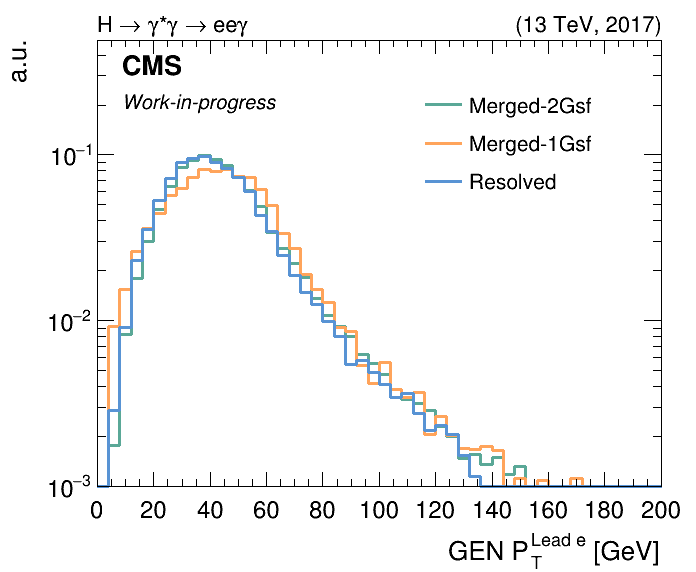

In [6]:
# Gen electron leading pT
h1 = rdf.Filter("category == 2").Histo1D(("h1", " ", 50, 0, 200), "mcPt_lep1", "wei")
h1.Scale(1. / h1.Integral())

h2 = rdf.Filter("category == 3").Histo1D(("h2", " ", 50, 0, 200), "mcPt_lep1", "wei")
h2.Scale(1. / h2.Integral())

h3 = rdf.Filter("category == 1").Histo1D(("h3", " ", 50, 0, 200), "mcPt_lep1", "wei")
h3.Scale(1. / h3.Integral())


c1 = ROOT.TCanvas("c1", "", 700, 600)
c1.cd()

Draw1DHist(c1, [h1, h2, h3], [None, None, None], ["#5aa897","#ffa45b", "#5893d4"], xaxis = "GEN P^{Lead e}_{T} [GeV]", yaxis = "a.u.", option = "hist", Log = True)
CMS_lumi(c1, 4, 10, "", 2017, True, "Work-in-progress", "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "")

leg = ROOT.TLegend(0.6, 0.65, 0.9, 0.85)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Merged-2Gsf", "l")
leg.AddEntry(h2.GetPtr(), "Merged-1Gsf", "l")
leg.AddEntry(h3.GetPtr(), "Resolved", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

c1.Print("{}/GenVars_mcPt_lep1.pdf".format(outRes))

CMS (Preliminary) out of frame? --> False
lumiText =   (13 TeV, 2017)
procText =  H #rightarrow #gamma*#gamma #rightarrow ee#gamma


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file ./plots/GenVars/GenVars_mcPt_lep2.pdf has been created


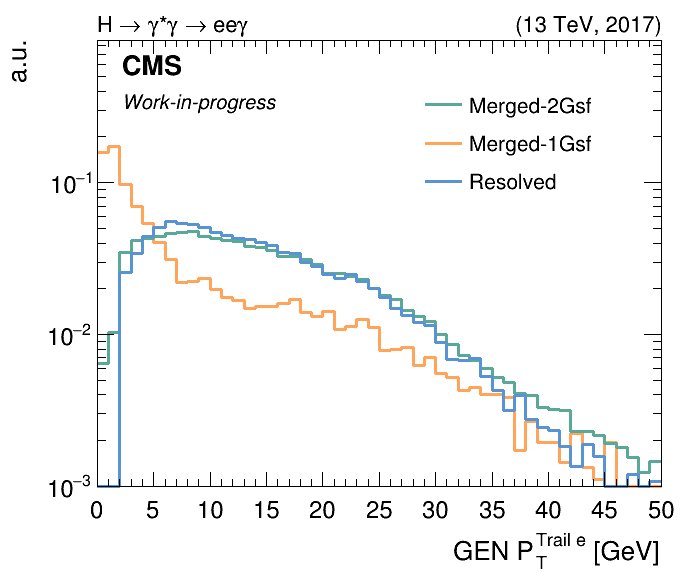

In [7]:
# Gen electron trailing pT
h1 = rdf.Filter("category == 2").Histo1D(("h1", " ", 50, 0, 50), "mcPt_lep2", "wei")
h1.Scale(1. / h1.Integral())

h2 = rdf.Filter("category == 3").Histo1D(("h2", " ", 50, 0, 50), "mcPt_lep2", "wei")
h2.Scale(1. / h2.Integral())

h3 = rdf.Filter("category == 1").Histo1D(("h3", " ", 50, 0, 50), "mcPt_lep2", "wei")
h3.Scale(1. / h3.Integral())


c1 = ROOT.TCanvas("c1", "", 700, 600)
c1.cd()

Draw1DHist(c1, [h2, h1, h3], [None, None, None], ["#ffa45b", "#5aa897", "#5893d4"], xaxis = "GEN P^{Trail e}_{T} [GeV]", yaxis = "a.u.", option = "hist", Log = True)
CMS_lumi(c1, 4, 10, "", 2017, True, "Work-in-progress", "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "")

leg = ROOT.TLegend(0.6, 0.65, 0.9, 0.85)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Merged-2Gsf", "l")
leg.AddEntry(h2.GetPtr(), "Merged-1Gsf", "l")
leg.AddEntry(h3.GetPtr(), "Resolved", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

c1.Print("{}/GenVars_mcPt_lep2.pdf".format(outRes))

In [8]:
rdf = rdf.Define("mcdR", "GenEle_lep1.DeltaR(GenEle_lep2)")

CMS (Preliminary) out of frame? --> False
lumiText =   (13 TeV, 2017)
procText =  H #rightarrow #gamma*#gamma #rightarrow ee#gamma


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file ./plots/GenVars/GenVars_mcdR.pdf has been created


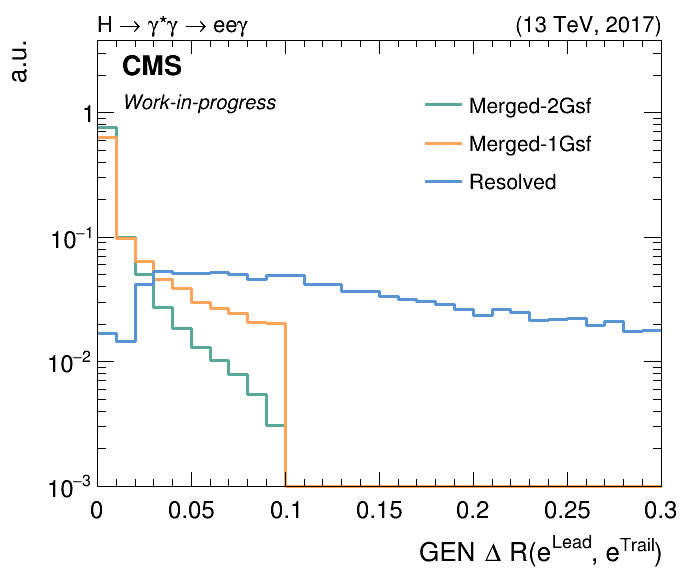

In [9]:
# dR between Gen electron leading/trailing pT
h1 = rdf.Filter("category == 2").Histo1D(("h1", " ", 30, 0, 0.3), "mcdR", "wei")
h1.Scale(1. / h1.Integral())

h2 = rdf.Filter("category == 3").Histo1D(("h2", " ", 30, 0, 0.3), "mcdR", "wei")
h2.Scale(1. / h2.Integral())

h3 = rdf.Filter("category == 1").Histo1D(("h3", " ", 30, 0, 0.3), "mcdR", "wei")
h3.Scale(1. / h3.Integral())


c1 = ROOT.TCanvas("c1", "", 700, 600)
c1.cd()

Draw1DHist(c1, [h1, h2, h3], [None, None, None], ["#5aa897", "#ffa45b", "#5893d4"], xaxis = "GEN #Delta R(e^{Lead}, e^{Trail})", yaxis = "a.u.", option = "hist", Log = True)
CMS_lumi(c1, 4, 10, "", 2017, True, "Work-in-progress", "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "")

leg = ROOT.TLegend(0.6, 0.65, 0.9, 0.85)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Merged-2Gsf", "l")
leg.AddEntry(h2.GetPtr(), "Merged-1Gsf", "l")
leg.AddEntry(h3.GetPtr(), "Resolved", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

c1.Print("{}/GenVars_mcdR.pdf".format(outRes))

In [10]:
rdf = rdf.Define("mcdPhi", "GenEle_lep1.DeltaPhi(GenEle_lep2)")

CMS (Preliminary) out of frame? --> False
lumiText =   (13 TeV, 2017)
procText =  H #rightarrow #gamma*#gamma #rightarrow ee#gamma


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file ./plots/GenVars/GenVars_mcdPhi.pdf has been created


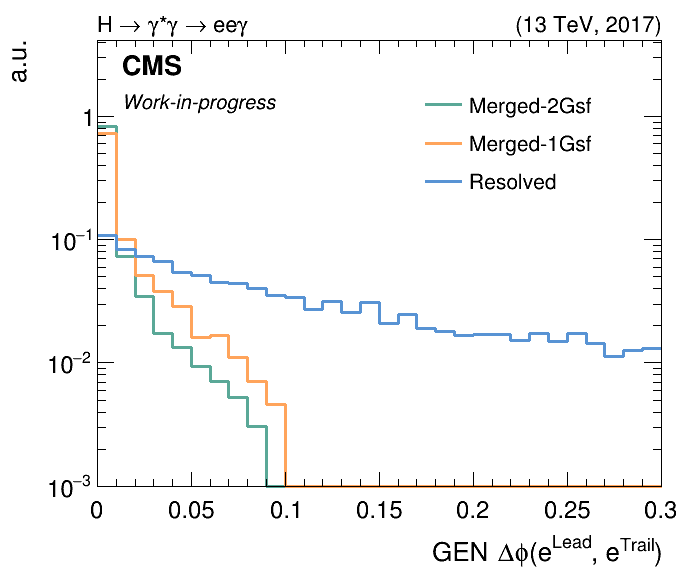

In [11]:
# dPhi between Gen electron leading/trailing pT
h1 = rdf.Filter("category == 2").Histo1D(("h1", " ", 30, 0, 0.3), "mcdPhi", "wei")
h1.Scale(1. / h1.Integral())

h2 = rdf.Filter("category == 3").Histo1D(("h2", " ", 30, 0, 0.3), "mcdPhi", "wei")
h2.Scale(1. / h2.Integral())

h3 = rdf.Filter("category == 1").Histo1D(("h3", " ", 30, 0, 0.3), "mcdPhi", "wei")
h3.Scale(1. / h3.Integral())


c1 = ROOT.TCanvas("c1", "", 700, 600)
c1.cd()

Draw1DHist(c1, [h1, h2, h3], [None, None, None], ["#5aa897", "#ffa45b", "#5893d4"], xaxis = "GEN #Delta#phi(e^{Lead}, e^{Trail})", yaxis = "a.u.", option = "hist", Log = True)
CMS_lumi(c1, 4, 10, "", 2017, True, "Work-in-progress", "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "")

leg = ROOT.TLegend(0.6, 0.65, 0.9, 0.85)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Merged-2Gsf", "l")
leg.AddEntry(h2.GetPtr(), "Merged-1Gsf", "l")
leg.AddEntry(h3.GetPtr(), "Resolved", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

c1.Print("{}/GenVars_mcdPhi.pdf".format(outRes))

In [12]:
rdf = rdf.Define("mcdEta", "abs(GenEle_lep1.Eta() - GenEle_lep2.Eta())")

CMS (Preliminary) out of frame? --> False
lumiText =   (13 TeV, 2017)
procText =  H #rightarrow #gamma*#gamma #rightarrow ee#gamma


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file ./plots/GenVars/GenVars_mcdEta.pdf has been created


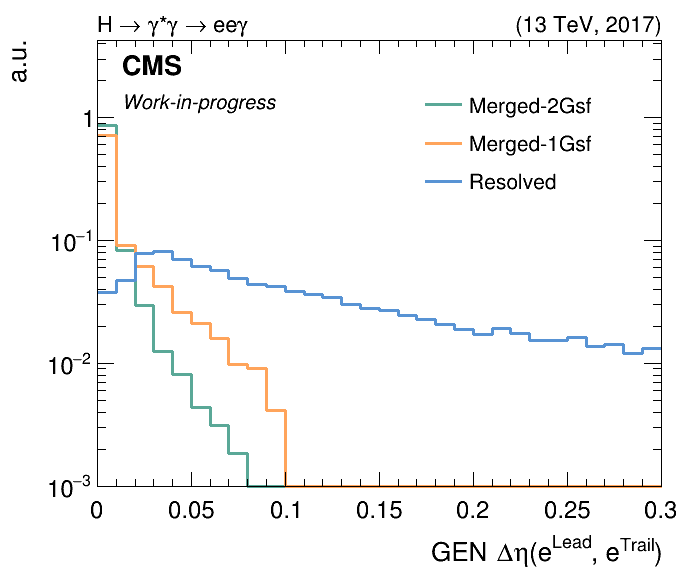

In [13]:
# dEta between Gen electron leading/trailing pT
h1 = rdf.Filter("category == 2").Histo1D(("h1", " ", 30, 0, 0.3), "mcdEta", "wei")
h1.Scale(1. / h1.Integral())

h2 = rdf.Filter("category == 3").Histo1D(("h2", " ", 30, 0, 0.3), "mcdEta", "wei")
h2.Scale(1. / h2.Integral())

h3 = rdf.Filter("category == 1").Histo1D(("h3", " ", 30, 0, 0.3), "mcdEta", "wei")
h3.Scale(1. / h3.Integral())


c1 = ROOT.TCanvas("c1", "", 700, 600)
c1.cd()

Draw1DHist(c1, [h1, h2, h3], [None, None, None], ["#5aa897", "#ffa45b", "#5893d4"], xaxis = "GEN #Delta#eta(e^{Lead}, e^{Trail})", yaxis = "a.u.", option = "hist", Log = True)
CMS_lumi(c1, 4, 10, "", 2017, True, "Work-in-progress", "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "")

leg = ROOT.TLegend(0.6, 0.65, 0.9, 0.85)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Merged-2Gsf", "l")
leg.AddEntry(h2.GetPtr(), "Merged-1Gsf", "l")
leg.AddEntry(h3.GetPtr(), "Resolved", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

c1.Print("{}/GenVars_mcdEta.pdf".format(outRes))

In [14]:
rdf = rdf.Define("mcMll", "(GenEle_lep1 + GenEle_lep2).M()")

CMS (Preliminary) out of frame? --> False
lumiText =   (13 TeV, 2017)
procText =  H #rightarrow #gamma*#gamma #rightarrow ee#gamma


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file ./plots/GenVars/GenVars_mcMll_enlarge.pdf has been created


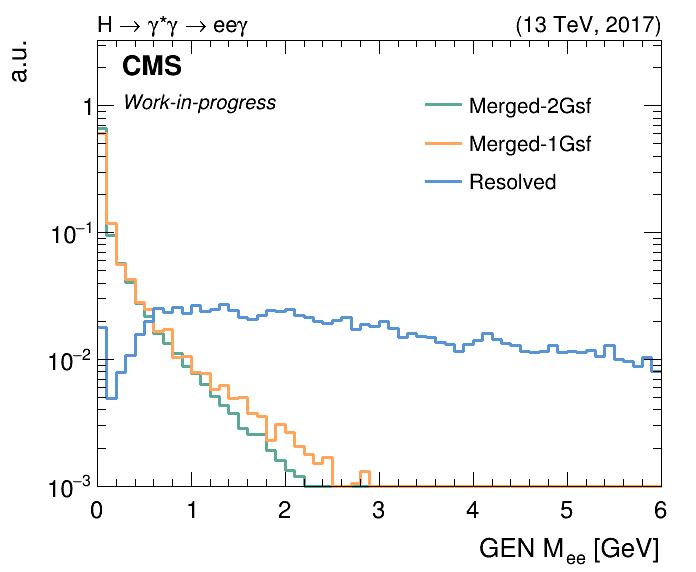

In [15]:
# Mll of Gen electron leading/trailing pT
h1 = rdf.Filter("category == 2").Histo1D(("h1", " ", 60, 0, 6), "mcMll", "wei")
h1.Scale(1. / h1.Integral())

h2 = rdf.Filter("category == 3").Histo1D(("h2", " ", 60, 0, 6), "mcMll", "wei")
h2.Scale(1. / h2.Integral())

h3 = rdf.Filter("category == 1").Histo1D(("h3", " ", 60, 0, 6), "mcMll", "wei")
h3.Scale(1. / h3.Integral())


c1 = ROOT.TCanvas("c1", "", 700, 600)
c1.cd()

Draw1DHist(c1, [h1, h2, h3], [None, None, None], ["#5aa897", "#ffa45b", "#5893d4"], xaxis = "GEN M_{ee} [GeV]", yaxis = "a.u.", option = "hist", Log = True)
CMS_lumi(c1, 4, 10, "", 2017, True, "Work-in-progress", "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "")

leg = ROOT.TLegend(0.6, 0.65, 0.9, 0.85)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Merged-2Gsf", "l")
leg.AddEntry(h2.GetPtr(), "Merged-1Gsf", "l")
leg.AddEntry(h3.GetPtr(), "Resolved", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

c1.Print("{}/GenVars_mcMll_enlarge.pdf".format(outRes))

CMS (Preliminary) out of frame? --> False
lumiText =   (13 TeV, 2017)
procText =  H #rightarrow #gamma*#gamma #rightarrow ee#gamma


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file ./plots/GenVars/GenVars_mcMll.pdf has been created


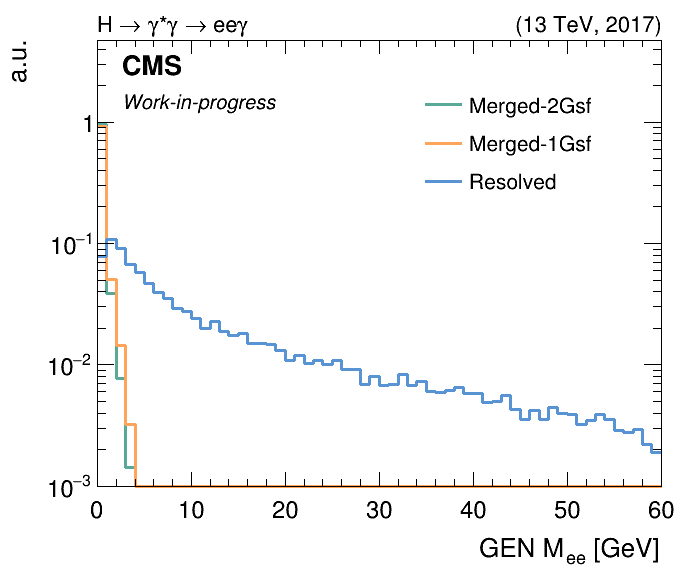

In [16]:
# Mll of Gen electron leading/trailing pT
h1 = rdf.Filter("category == 2").Histo1D(("h1", " ", 60, 0, 60), "mcMll", "wei")
h1.Scale(1. / h1.Integral())

h2 = rdf.Filter("category == 3").Histo1D(("h2", " ", 60, 0, 60), "mcMll", "wei")
h2.Scale(1. / h2.Integral())

h3 = rdf.Filter("category == 1").Histo1D(("h3", " ", 60, 0, 60), "mcMll", "wei")
h3.Scale(1. / h3.Integral())


c1 = ROOT.TCanvas("c1", "", 700, 600)
c1.cd()

Draw1DHist(c1, [h1, h2, h3], [None, None, None], ["#5aa897", "#ffa45b", "#5893d4"], xaxis = "GEN M_{ee} [GeV]", yaxis = "a.u.", option = "hist", Log = True)
CMS_lumi(c1, 4, 10, "", 2017, True, "Work-in-progress", "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "")

leg = ROOT.TLegend(0.6, 0.65, 0.9, 0.85)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Merged-2Gsf", "l")
leg.AddEntry(h2.GetPtr(), "Merged-1Gsf", "l")
leg.AddEntry(h3.GetPtr(), "Resolved", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

c1.Print("{}/GenVars_mcMll.pdf".format(outRes))

In [17]:
rdf = rdf.Define("mcPtll", "(GenEle_lep1 + GenEle_lep2).Pt()")

CMS (Preliminary) out of frame? --> False
lumiText =   (13 TeV, 2017)
procText =  H #rightarrow #gamma*#gamma #rightarrow ee#gamma


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file ./plots/GenVars/GenVars_mcPtll.pdf has been created


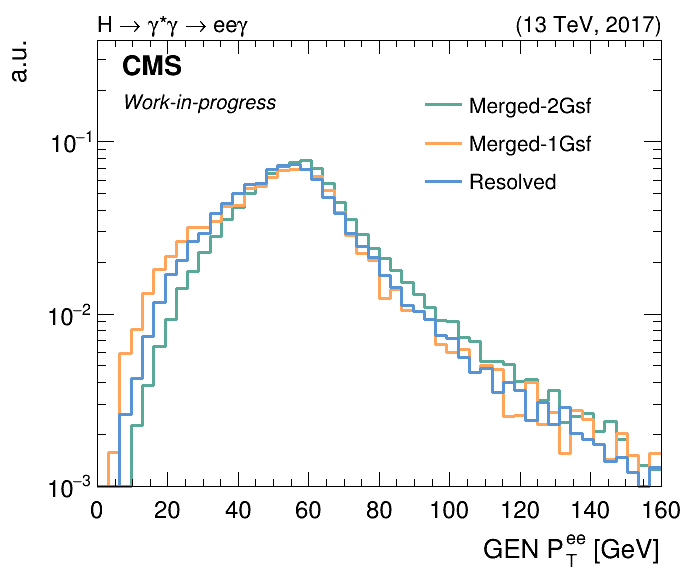

In [18]:
# Pt of Gen electron leading/trailing pT

h1 = rdf.Filter("category == 2").Histo1D(("h1", " ", 50, 0, 160), "mcPtll", "wei")
h1.Scale(1. / h1.Integral())

h2 = rdf.Filter("category == 3").Histo1D(("h2", " ", 50, 0, 160), "mcPtll", "wei")
h2.Scale(1. / h2.Integral())

h3 = rdf.Filter("category == 1").Histo1D(("h3", " ", 50, 0, 160), "mcPtll", "wei")
h3.Scale(1. / h3.Integral())


c1 = ROOT.TCanvas("c1", "", 700, 600)
c1.cd()

Draw1DHist(c1, [h1, h2, h3], [None, None, None], ["#5aa897", "#ffa45b", "#5893d4"], xaxis = "GEN P^{ee}_{T} [GeV]", yaxis = "a.u.", option = "hist", Log = True)
CMS_lumi(c1, 4, 10, "", 2017, True, "Work-in-progress", "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "")

leg = ROOT.TLegend(0.6, 0.65, 0.9, 0.85)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Merged-2Gsf", "l")
leg.AddEntry(h2.GetPtr(), "Merged-1Gsf", "l")
leg.AddEntry(h3.GetPtr(), "Resolved", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

c1.Print("{}/GenVars_mcPtll.pdf".format(outRes))